<a href="https://colab.research.google.com/github/juandi247/mc-2023-juan-diaz/blob/main/tALLER22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polinomio de interpolación de Lagrange: 0.0166666666666668*x**4 - 0.466666666666668*x**3 + 2.58333333333333*x**2 - 2.93333333333333*x + 1.0


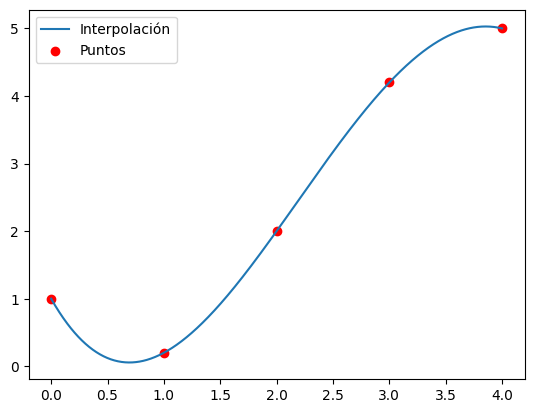

In [1]:

import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, simplify

def lagrange_interpolation(points):
    
    n = len(points)
    
    lagrange_polynomials = []
    for i in range(n):
        lagrange_poly = []
        for j in range(n):
            if i == j:
                continue
            x_i, y_i = points[i]
            x_j, y_j = points[j]
            lagrange_poly.append((symbols('x')-x_j)/(x_i-x_j))
        lagrange_polynomials.append(lagrange_poly)
  
    interpolation_poly = 0
    for i in range(n):
        coeff = points[i][1]
        for j in range(n):
            if i == j:
                continue
            x_j, y_j = points[j]
            coeff *= (symbols('x')-x_j)/(points[i][0]-x_j)
        interpolation_poly += coeff
  
    interpolation_poly = simplify(interpolation_poly)
  
    return interpolation_poly

points = [(0, 1), (1, 0.2), (2, 2), (3, 4.2), (4, 5)]


interpolation_poly = lagrange_interpolation(points)

print(f"Polinomio de interpolación de Lagrange: {interpolation_poly}")


interpolation_function = eval(f"lambda x: {interpolation_poly}")


x_values = np.linspace(0, 4, 1000)
y_values = interpolation_function(x_values)

plt.plot(x_values, y_values, label="Interpolación")
plt.scatter([x[0] for x in points], [x[1] for x in points], color="red", label="Puntos")
plt.legend()
plt.show()